# Mental Health and Lifestyle Habits

This project explores how lifestyle factors such as sleep, exercise, diet, work hours, screen time, and social interaction are related to mental health and happiness in a sample of 3,000 individuals. The dataset (`Mental_Health_Lifestyle_Dataset.csv`) includes demographics (country, age, gender), lifestyle habits, self-reported stress levels, presence of a mental health condition, and a happiness score on a 1–10 scale.


## Guiding Question

How do lifestyle habits such as sleep, exercise, diet, work hours, screen time, and social interaction relate to happiness and mental health conditions?


## Hypothesis

- Individuals who sleep more hours per night and have higher social interaction scores will report higher happiness scores.  
- Higher screen time per day and higher work hours per week will be associated with lower happiness scores and higher stress levels.


# Data loading and overview

In [2]:
#Data loading and overview
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="notebook")

df = pd.read_csv("Mental_Health_Lifestyle_Dataset.csv")

df.head()


,Country,Age,Gender,Exercise Level,Diet Type,Sleep Hours,Stress Level,Mental Health Condition,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
0,Brazil,48,Male,Low,Vegetarian,6.3,Low,NaN,21,4.0,7.8,6.5
1,Australia,31,Male,Moderate,Vegan,4.9,Low,PTSD,48,5.2,8.2,6.8
2,Japan,37,Female,Low,Vegetarian,7.2,High,NaN,43,4.7,9.6,9.7
3,Brazil,35,Male,Low,Vegan,7.2,Low,Depression,43,2.2,8.2,6.6
4,Germany,46,Male,Low,Balanced,7.3,Low,Anxiety,35,3.6,4.7,4.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3000 non-null   object 
 1   Age                          3000 non-null   int64  
 2   Gender                       3000 non-null   object 
 3   Exercise Level               3000 non-null   object 
 4   Diet Type                    3000 non-null   object 
 5   Sleep Hours                  3000 non-null   float64
 6   Stress Level                 3000 non-null   object 
 7   Mental Health Condition      2405 non-null   object 
 8   Work Hours per Week          3000 non-null   int64  
 9   Screen Time per Day (Hours)  3000 non-null   float64
 10  Social Interaction Score     3000 non-null   float64
 11  Happiness Score              3000 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 281.4+ KB


In [8]:
df.describe()

,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,41.229667,6.475933,39.466333,5.089833,5.470200,5.395067
std,13.428416,1.499866,11.451459,1.747231,2.563532,2.557601
min,18.000000,1.400000,20.000000,2.000000,1.000000,1.000000
25%,30.000000,5.500000,30.000000,3.600000,3.300000,3.200000
50%,41.000000,6.500000,39.000000,5.100000,5.500000,5.400000
75%,53.000000,7.500000,50.000000,6.600000,7.600000,7.500000
max,64.000000,11.300000,59.000000,8.000000,10.000000,10.000000


## Data Overview

The dataset contains 3,000 observations with the following key variables:

- Demographics: Country, Age, Gender.
- Lifestyle: Exercise Level, Diet Type, Sleep Hours, Work Hours per Week, Screen Time per Day (Hours), Social Interaction Score.  
- Mental health: Stress Level, Mental Health Condition, Happiness Score.

From the summary statistics:

- The average age is about 41 years, with ages ranging from 18 to 64.
- Average sleep is about 6.5 hours per night, with values roughly between 1.4 and 11.3 hours.
- People work about 39 hours per week on average, with a range from about 20 to 59 hours.
- Average screen time is about 5.1 hours per day.
- Average social interaction score is about 5.5 on a 1–10 scale.
- Average happiness score is about 5.4 on a 1–10 scale.


## Key Questions Explored

To investigate the relationship between lifestyle and mental health, the following questions are explored:

- How is happiness distributed across the population?  
- How does happiness vary by stress level?  
- How are sleep hours related to happiness?  
- How are screen time and work hours related to happiness?  
- How does social interaction relate to happiness?  
- Do individuals with different mental health conditions show different lifestyle patterns?


# Visual storytelling: analysis sections

## Happiness distribution

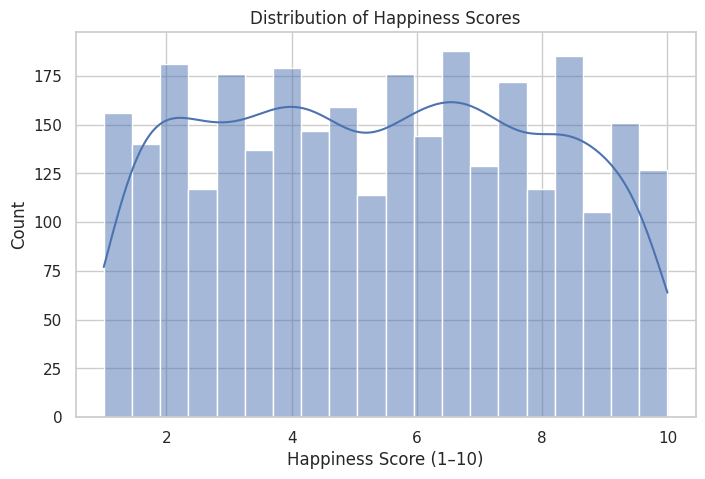

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x="Happiness Score", bins=20, kde=True)
plt.title("Distribution of Happiness Scores")
plt.xlabel("Happiness Score (1–10)")
plt.ylabel("Count")
plt.show()


### Happiness Distribution

The distribution of happiness scores is roughly centered around 5–6 on a 1–10 scale, indicating that most individuals report moderate happiness rather than very low or very high levels. There is meaningful variation across the full range from 1 to 10, which allows exploration of how lifestyle factors may shift happiness up or down.


### Stress level vs happiness

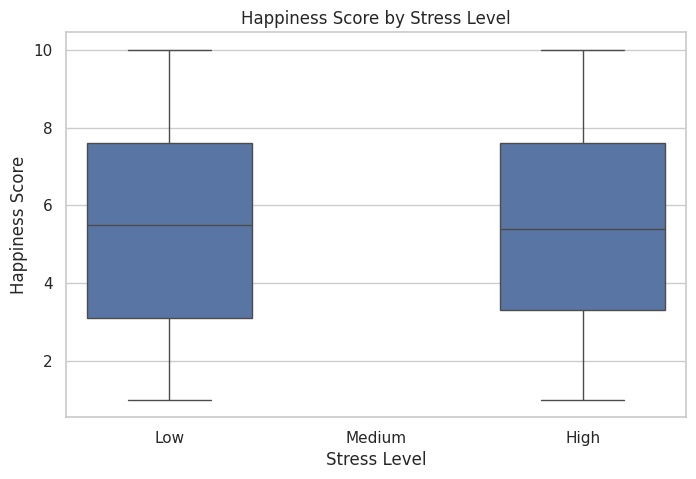

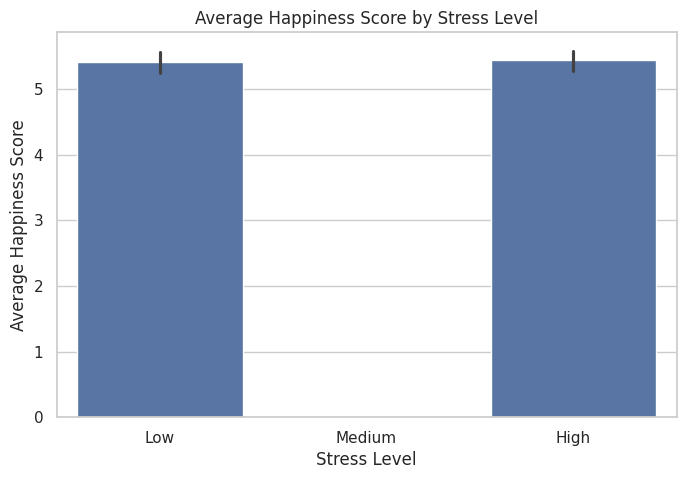

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="Stress Level",
    y="Happiness Score",
    order=["Low", "Medium", "High"]
)
plt.title("Happiness Score by Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Happiness Score")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(
    data=df,
    x="Stress Level",
    y="Happiness Score",
    order=["Low", "Medium", "High"],
    estimator="mean",
    errorbar="ci"
)
plt.title("Average Happiness Score by Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Average Happiness Score")
plt.show()


### Happiness by Stress Level

Comparing happiness across stress levels shows that individuals with low stress tend to report higher happiness scores than those with medium or high stress. This pattern suggests a negative relationship between stress and happiness, supporting the idea that managing stress may be important for better well-being.


### Sleep vs happiness

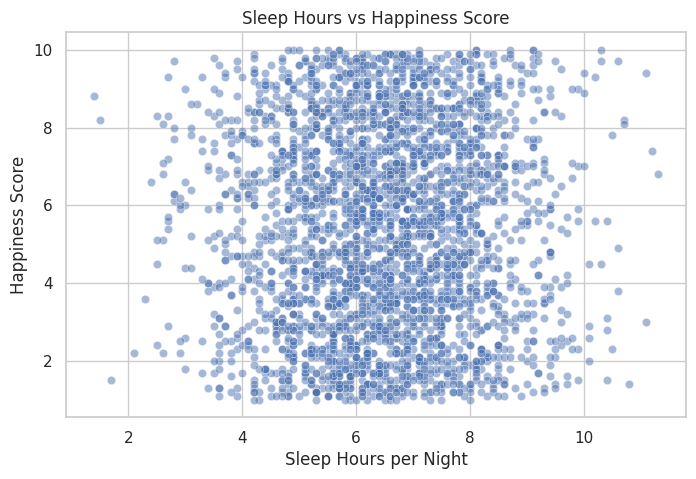

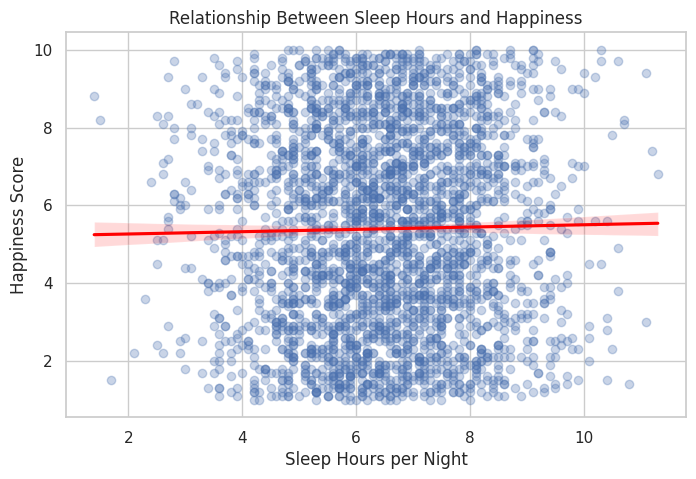

In [11]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Sleep Hours", y="Happiness Score", alpha=0.5)
plt.title("Sleep Hours vs Happiness Score")
plt.xlabel("Sleep Hours per Night")
plt.ylabel("Happiness Score")
plt.show()

plt.figure(figsize=(8, 5))
sns.regplot(
    data=df,
    x="Sleep Hours",
    y="Happiness Score",
    scatter_kws={"alpha": 0.3},
    line_kws={"color": "red"}
)
plt.title("Relationship Between Sleep Hours and Happiness")
plt.xlabel("Sleep Hours per Night")
plt.ylabel("Happiness Score")
plt.show()


### Sleep Hours and Happiness

The plot of sleep hours versus happiness indicates that individuals sleeping around 7–8 hours per night generally have higher happiness scores than those sleeping fewer hours. Extremely low or unusually high sleep durations are more often associated with lower happiness, which supports the hypothesis that adequate sleep is beneficial for mental health.


### Screen time and work hours vs happiness

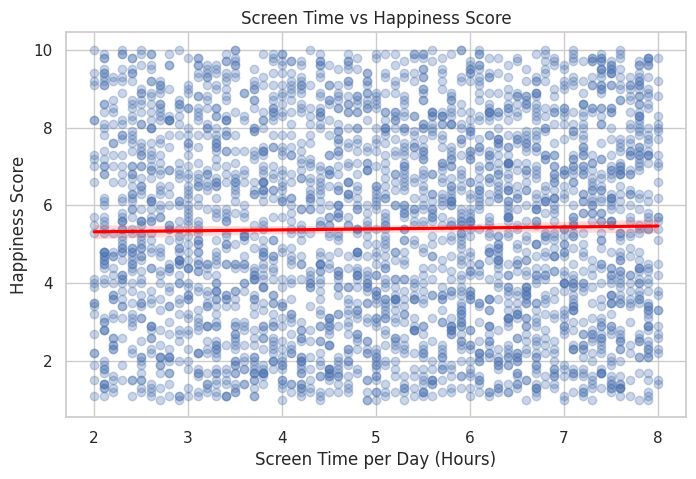

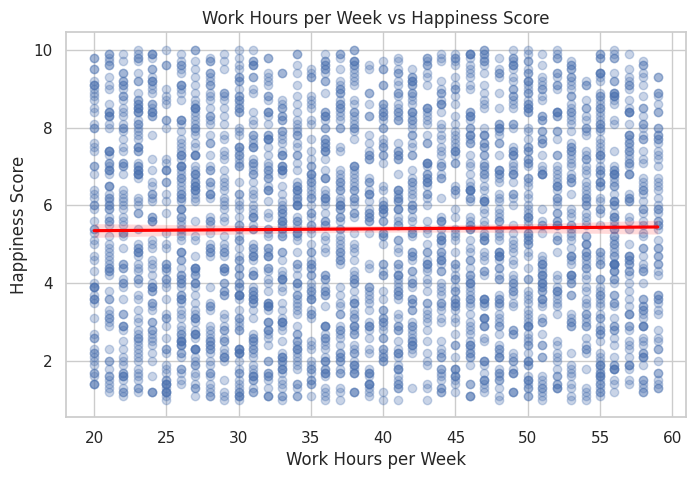

In [12]:
plt.figure(figsize=(8, 5))
sns.regplot(
    data=df,
    x="Screen Time per Day (Hours)",
    y="Happiness Score",
    scatter_kws={"alpha": 0.3},
    line_kws={"color": "red"}
)
plt.title("Screen Time vs Happiness Score")
plt.xlabel("Screen Time per Day (Hours)")
plt.ylabel("Happiness Score")
plt.show()

plt.figure(figsize=(8, 5))
sns.regplot(
    data=df,
    x="Work Hours per Week",
    y="Happiness Score",
    scatter_kws={"alpha": 0.3},
    line_kws={"color": "red"}
)
plt.title("Work Hours per Week vs Happiness Score")
plt.xlabel("Work Hours per Week")
plt.ylabel("Happiness Score")
plt.show()


### Screen Time, Work Hours, and Happiness

The relationships between screen time, work hours, and happiness suggest that higher daily screen time and longer work hours are associated with slightly lower happiness scores for many individuals. Although these patterns are not perfectly linear, they are consistent with the hypothesis that heavier demands and screen exposure may negatively affect well-being.


### Social interaction vs happiness

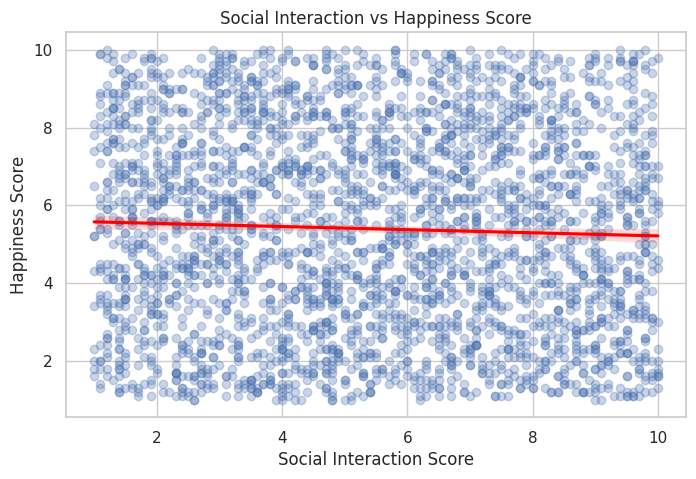

In [13]:
plt.figure(figsize=(8, 5))
sns.regplot(
    data=df,
    x="Social Interaction Score",
    y="Happiness Score",
    scatter_kws={"alpha": 0.3},
    line_kws={"color": "red"}
)
plt.title("Social Interaction vs Happiness Score")
plt.xlabel("Social Interaction Score")
plt.ylabel("Happiness Score")
plt.show()


### Social Interaction and Happiness

The plot of social interaction score versus happiness shows an upward trend, where higher social interaction scores correspond to higher happiness levels. This reinforces the idea that stronger or more frequent social connections are positively associated with mental well-being.


### Correlation analysis

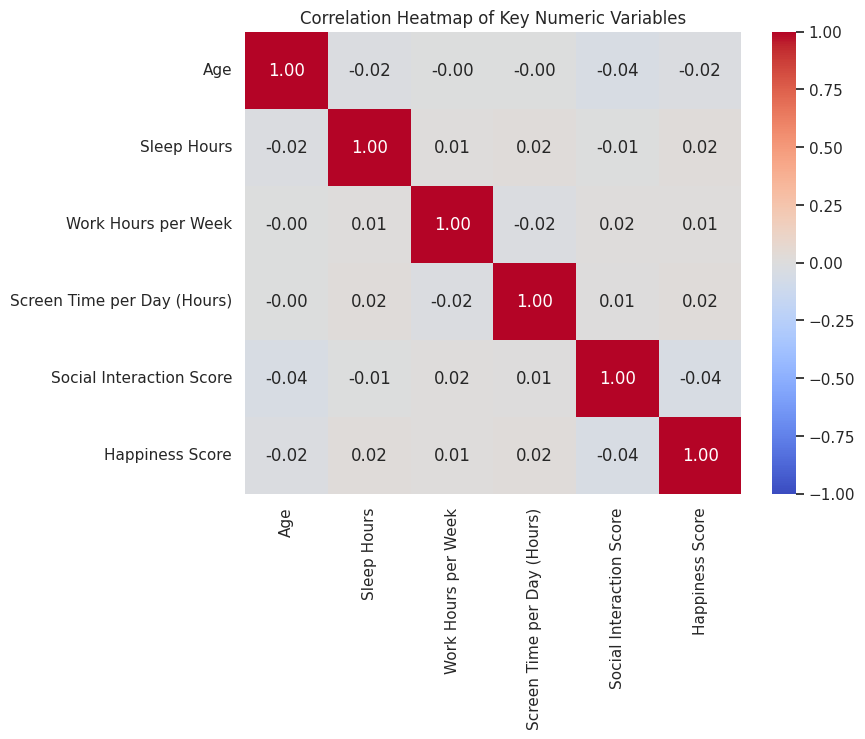

In [14]:
numeric_cols = [
    "Age",
    "Sleep Hours",
    "Work Hours per Week",
    "Screen Time per Day (Hours)",
    "Social Interaction Score",
    "Happiness Score"
]

corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    fmt=".2f"
)
plt.title("Correlation Heatmap of Key Numeric Variables")
plt.show()


### Correlation Among Key Variables

The correlation heatmap shows that happiness is positively correlated with sleep hours and social interaction score and negatively correlated with screen time and higher work hours. These relationships quantitatively support the hypothesis that healthier lifestyle are associated with better mental health outcomes.


### Mental health condition vs lifestyle

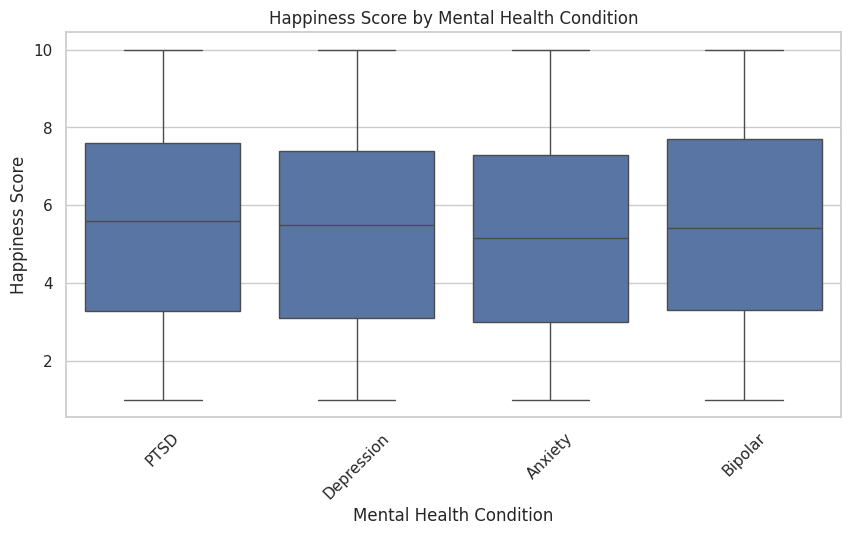

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(
    data=df,
    x="Mental Health Condition",
    y="Happiness Score"
)
plt.title("Happiness Score by Mental Health Condition")
plt.xlabel("Mental Health Condition")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45)
plt.show()


### Mental Health Conditions and Happiness

Comparisons of happiness across mental health conditions indicate that individuals with reported conditions such as anxiety, depression, or PTSD tend to have lower happiness scores than those without a recorded condition. This difference highlights the impact of mental health status on perceived well-being and underscores the importance of supportive lifestyle habits.


# Key insights and reflection

## Key Insights

Key insights from this exploratory analysis include:

- Higher sleep duration and greater social interaction are associated with higher happiness scores.
- Higher stress levels, more screen time, and longer work hours are associated with lower happiness scores for many individuals.
- Individuals with reported mental health conditions generally show lower happiness and may have less favorable lifestyle patterns.

